### Assignment I
Develop a graph library. It should have the following functionalities
- Create a node
- Insert and delete edges and nodes
- Using your self-made graph library, try loading the graph data presented on page 83rd of the textbook.  The file containing the cities will be given to you. 

We have implemented the graph as an adjacency list. On creation of node the graph assigns a random latitude and longitude for the node and when and edge is created between nodes their haversine distance is calculated and used as the cost between the nodes.

In [124]:
import random
import math
class Graph:
    """
    Graph class that defines a graph data structure
    """
    def __init__(self):
        self.graph = {}
        self.locations = {}

    def createNode(self, node):
        """
        Create a node in the graph
        Args:
            node: value of node of creation
        """
        self.graph[node] = []
        self.locations[node] = (random.uniform(1.0, 25) , random.uniform(1.0, 25))
    
    def haversine_distance(self, lat1, lon1, lat2, lon2):
        R = 6371  # radius of Earth in kilometers
        phi1 = math.radians(lat1)
        phi2 = math.radians(lat2)
        delta_phi = math.radians(lat2 - lat1)
        delta_lambda = math.radians(lon2 - lon1)
        a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        d = R * c
        return d

    def insertEdge(self, node_A, node_B, cost):
        """
        Insert Edge between node_A and node_B
        Args:
            node_A: first node
            node_B: second node
            cost: cost between node_A and node_B
        """

        if node_A not in self.graph:
            self.createNode(node_A)
        if node_B not in self.graph:
            self.createNode(node_B)
        
        if cost == 1:
            cost = int(self.haversine_distance(self.locations[node_A][0], self.locations[node_A][1], self.locations[node_B][0], self.locations[node_B][1]))
        
        self.graph[node_A].append((node_B, cost))
        self.graph[node_B].append((node_A, cost))
    
    def deleteEdge(self, node_A, node_B, cost):
        """
        delete edge between node node_A and node_B
        Args:
            node_A: first node
            node_B: second node
            cost: cost between node_A and node_B
        """
        self.graph[node_A].remove((node_B, cost))
        self.graph[node_B].remove((node_A, cost))

    def deleteNode(self, node_A):
        """
        delete node from graph
        """
        for node in self.graph:
            for neighbor in self.graph[node]:
                if neighbor[0] == node_A:
                    self.graph[node].remove(neighbor)
        
        del self.graph[node_A]
    
    def neighbours(self,nod):
        if nod in self.graph and self.graph[nod] != None:
            return self.graph[nod]

We can now load the graph on the textbook using the created graph library. We will read the latitudes and longitudes data from a file and assign it to the locations variable of the graph object we are going to create.


<img src="./graph_pic.png">

In [125]:
Data = {}
with open("./citys.txt","r") as file:
    for line in file:
        line = line.split()
        if len(line) > 3:
            Data[f"{line[0]} {line[1]}"] = (line[2], line[3])
        else:
            Data[line[0]] = (line[1],line[2])
del Data['City']

romania = Graph()
romania.insertEdge('Oradea','Sibiu', 151 )
romania.insertEdge('Oradea','Zerind', 71)
romania.insertEdge('Zerind','Arad', 75)
romania.insertEdge('Arad','Sibiu', 140)
romania.insertEdge('Arad','Timisoara', 118)
romania.insertEdge('Sibiu','Fagaras', 99)
romania.insertEdge('Sibiu','Rimnicu Vilcea', 80)
romania.insertEdge('Timisoara','Lugoj', 111)
romania.insertEdge('Lugoj','Mehadia', 70)
romania.insertEdge('Mehadia','Drobeta', 75)
romania.insertEdge('Drobeta','Craiova', 120)
romania.insertEdge('Craiova','Pitesti', 138)
romania.insertEdge('Rimnicu Vilcea','Pitesti', 97)
romania.insertEdge('Rimnicu Vilcea', 'Craiova', 146)
romania.insertEdge('Fagaras', 'Bucharest', 211)
romania.insertEdge('Pitesti', 'Bucharest', 101)
romania.insertEdge('Bucharest', 'Urziceni', 85)
romania.insertEdge('Bucharest', 'Giurgiu', 90)
romania.insertEdge('Urziceni', 'Hirsova', 98)
romania.insertEdge('Urziceni', 'Vaslui', 142)
romania.insertEdge('Hirsova', 'Eforie', 86)
romania.insertEdge('Vaslui', 'Iasi', 92)
romania.insertEdge('Iasi', 'Neamt', 87)
romania.locations = Data

2. Implement BFS, DFS, UCS, Iterative Deepening, Bidirectional Search, Greedy, and A* Search algorithms. Using the graph from Question 2, evaluate each of your algorithms and benchmark them.  Remember to run each experiment to run 10 times and report the average of the 5 trials. 

We will implement each search algorithm.


In [126]:
from collections import deque
import heapq
import math
import util

def dfs1(start, end, adj_list, path = []):
    path = path + [start]
    if start == end:
        return path
    for node in adj_list[start]:
        if node[0] not in path:
            new_path = dfs1(node[0], end, adj_list, path)
            if new_path:
                return new_path
    return None


def bfs(start, end, adj_list):
    queue = deque()
    visited = set()

    queue.append((start, [start]))

    while queue:
        node, path = queue.popleft()
        if node == end:
            return path

        visited.add(node)
        for neighbor, cost in adj_list[node]:
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return None

def ucs(graph,source,destination):
    parent = {}
    closed = []
    open = util.PriorityQueue()
    open.push(source,0)
    
    while True:
        
        if open.isEmpty():
            break
        
        else:
            selected_node = open.pop()
            
        if selected_node == destination:
            break

        
        if selected_node not in closed:
            closed.append(selected_node)
    
        children = graph.neighbours(selected_node)

        if children != None:
            for child in children:
                city,cost = child
                if city not in parent.keys():
                    parent[city] = selected_node
        
                if city == destination:
                    closed.append(city)
                    break
        
                if cost != None and city not in closed:
                    open.push(city,cost)
    path = [destination]
    curr = destination
    while curr != source:
        curr = parent[curr]
        path.insert(0,curr)

    return path


def bidirectional(graph,source,destination):
    source_parent = {}
    source_visited = []
    source_queue = util.Queue()
    dest_parent = {}
    dest_visited = []
    path = []
    dest_queue = util.Queue()

    source_queue.push(source)
    dest_queue.push(destination)
    
    if graph.neighbours(destination):
        for ele in graph.neighbours(destination):
            if ele[0] == source:
                return [source, destination]


    while True and source_queue:
        selected = source_queue.pop()
        source_visited.append(selected)
        connected = graph.neighbours(selected)

        if connected != None:
            for child in connected:
                city,cost = child

                if city not in source_parent.keys() and city not in source_parent:
                    source_parent[city] = selected
            
                if city not in source_queue.list and city not in source_visited:
                    source_queue.push(city)
        

        selected_dest = dest_queue.pop()
        dest_visited.append(selected_dest)
        connected_dest = graph.neighbours(selected_dest)
        

        if connected_dest != None:
            for child in connected_dest:
                city_dest, cost_dest = child
                
                if city_dest not in dest_parent.keys() and city_dest not in dest_parent.values():
                    dest_parent[city_dest] = selected_dest
                if city_dest not in dest_queue.list and city_dest not in dest_visited:
                    dest_queue.push(city_dest)

        
    
        for each in source_queue.list:
            if each == source or each == destination:
                    
                    break
            if each in dest_queue.list:
                path_dest = []
                current_dest = dest_parent[each]
                while current_dest != destination:
                    path_dest.append(current_dest)
    
                    current_dest = dest_parent[current_dest]
                path_dest.append(destination)
                
                current = each
            
                while current != source:
                    if current not in path:
                        path.insert(0,current)
                        current = source_parent[current]
                
                path.insert(0,source)
            
                return path + path_dest

def Heuristic(node_A, node_B, cityData):
    """"
    calculates the distance between the two cities in km using Haversine formula
    """
    long1, lat1, long2, lat2 = map(math.radians, [float(cityData[node_A][1]), float(cityData[node_A][0]),float(cityData[node_B][0]) * (math.pi / 180), float(cityData[node_B][0])])

    dlon = long2 - long1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    r = 6371      # Radius of earth in kilometers.
    distance = c * r

    return distance

def find_taken_distance(path, graph):
    final_cost = 0
    visited = set()
    for i in range(len(path)):
        if i + 1 < len(path):
            for node in path:
                for neigbor in graph[node]:
                    if path[i + 1] == neigbor[0] and path[i + 1] not in visited:
                        visited.add(neigbor[0])
                        final_cost += neigbor[1]
    return final_cost

def greedy(adj_list, start, end, locations):
    """greedy search algorithm using the Haversine formula as the heuristic function."""
    actual_cost = {start: 0} 
    total_estimated_cost = {start: Heuristic(start, end, locations)} 
    heap = [(total_estimated_cost[start], start)]
    visited = set()
    predecessor = {}
    
    while heap:
        _, current = heapq.heappop(heap)
        if current == end:
            path = []
            while current in predecessor:
                path.append(current)
                current = predecessor[current]
            path.append(start)
            path.reverse()
            return path
        
        visited.add(current)
        for neighbor, distance in adj_list[current]:
            if neighbor in visited:
                continue
            tentative_actual_cost = actual_cost[current] + distance
            if neighbor not in actual_cost or tentative_actual_cost < actual_cost[neighbor]:
                predecessor[neighbor] = current
                actual_cost[neighbor] = tentative_actual_cost
                total_estimated_cost[neighbor] = Heuristic(start, end, locations)
                heapq.heappush(heap, (total_estimated_cost[neighbor], neighbor))
    
    return None

def iterative_deepening_search(graph, start, goal, max_depth):
    """
    Iterative Deepening Search (IDS) algorithm for city search based on latitude and longitude coordinates.

    Args:
        graph (dict): Graph representation with city nodes as keys and latitude/longitude coordinates as values.
        start (str): Start city node.
        goal (str): Goal city node.
        max_depth (int): Maximum depth to explore in the search.

    Returns:
        list: List of city nodes representing the path from start to goal, or None if no path is found.
    """
    for depth in range(max_depth + 1):
        visited = set()
        path = dfs(graph, start, goal, depth, visited)
        if path is not None:
            return path
    return None

def dfs(graph, node, goal, depth, visited):
    """
    Depth-First Search (DFS) function for city search based on latitude and longitude coordinates.

    Args:
        graph (dict): Graph representation with city nodes as keys and latitude/longitude coordinates as values.
        node (str): Current city node.
        goal (str): Goal city node.
        depth (int): Remaining depth to explore in the search.
        visited (set): Set of visited city nodes.

    Returns:
        list: List of city nodes representing the path from start to goal, or None if no path is found.
    """
    if node == goal:
        return [node]
    if depth == 0:
        return None

    visited.add(node)
    for neighbor, cost in graph[node]:
        if neighbor not in visited:
            path = dfs(graph, neighbor, goal, depth - 1, visited)
            if path is not None:
                return [node] + path

    return None


def astar(adj_list, start, end, locations):
    """A* search algorithm using the Haversine formula as the heuristic function."""
    actual_cost = {start: 0} 
    total_estimated_cost = {start: Heuristic(start, end, locations)} 
    heap = [(total_estimated_cost[start], start)]
    visited = set()
    predecessor = {}
    
    while heap:
        _, current = heapq.heappop(heap)
        if current == end:
            path = []
            while current in predecessor:
                path.append(current)
                current = predecessor[current]
            path.append(start)
            path.reverse()
            return path
        
        visited.add(current)
        for neighbor, distance in adj_list[current]:
            if neighbor in visited:
                continue
            tentative_actual_cost = actual_cost[current] + distance
            if neighbor not in actual_cost or tentative_actual_cost < actual_cost[neighbor]:
                predecessor[neighbor] = current
                actual_cost[neighbor] = tentative_actual_cost
                total_estimated_cost[neighbor] = tentative_actual_cost + Heuristic(start, end, locations)
                heapq.heappush(heap, (total_estimated_cost[neighbor], neighbor))
    
    return None

We can now test each algoritm to find the path between Arad and Bucharest in the romania city.

In [127]:
path1 = dfs1("Arad", "Bucharest", romania.graph)
path2 = bfs("Arad", "Bucharest", romania.graph)
path3 = ucs(romania, "Arad", "Bucharest")
path4 = bidirectional(romania, "Arad", "Bucharest")
path5 = greedy(romania.graph, "Arad", "Bucharest", romania.locations)
path6 = iterative_deepening_search(romania.graph, "Arad", "Bucharest", 4)
path7 = astar(romania.graph, "Arad", "Bucharest", romania.locations)
print(path1, find_taken_distance(path1, romania.graph))
print(path2, find_taken_distance(path2, romania.graph))
print(path3, find_taken_distance(path3, romania.graph))
print(path4, find_taken_distance(path4, romania.graph))
print(path5, find_taken_distance(path5, romania.graph))
print(path6, find_taken_distance(path6, romania.graph))
print(path7, find_taken_distance(path7, romania.graph))

['Arad', 'Zerind', 'Oradea', 'Sibiu', 'Fagaras', 'Bucharest'] 596
['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450
['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Bucharest'] 733
['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450
['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450
['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450
['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest'] 418


As can be seen from path results and the total distance of the pathes in this graph setting
astar > iterative_depening >= bidirectional >= bfs >= dfs >= ucs >=  greedy_search

* Create random graphs with a number of nodes n = 10, 20, 30, 40.  Randomly connect nodes with the probability of edges p = 0.2, 0.4, 0.6, 0.8. In total, you will have 16 graphs. The generated node will have randomly generated x, and y value that represents their locations. Use those coordinates to compute the heuristic functions. 

I.  Randomly select 10 nodes and apply the above algorithms to find paths between them in all 16 graph settings. 
II.  Register the time taken to find a solution for each algorithm and graph. Run each experiment 5 times and have the average of the time taken in the five experiments.
III.  Use matplotlib.pyplot to plot their average time and solution (found path) length on each graph size. 

We will implemet a  method to generate a random graph using the Graph class.

In [128]:
def generate_random_graph(n, p):
    graph = Graph()
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            if i != j and random.random() < p:
                graph.insertEdge(i, j, 1)
    return graph

We can now generate the 16 graphs with the desired probability.

In [129]:
graph1 = generate_random_graph(10, 0.2)
graph2 = generate_random_graph(10, 0.4)
graph3 = generate_random_graph(10, 0.6)
graph4 = generate_random_graph(10, 0.8)

graph5 = generate_random_graph(20, 0.2)
graph6 = generate_random_graph(20, 0.4)
graph7 = generate_random_graph(20, 0.6)
graph8 = generate_random_graph(20, 0.8)

graph9 = generate_random_graph(30, 0.2)
graph10 = generate_random_graph(30, 0.4)
graph11 = generate_random_graph(30, 0.6)
graph12 = generate_random_graph(30, 0.8)

graph13 = generate_random_graph(40, 0.2)
graph14 = generate_random_graph(40, 0.4)
graph15 = generate_random_graph(40, 0.6)
graph16 = generate_random_graph(40, 0.8)

We can now select 10 nodes and apply each algoritm on all the 16 graphs and register the path length and time taken for each algoritm.

In [130]:
import timeit

Graphs = [graph1, graph2, graph3, graph4, graph5, graph6, graph7, graph8, graph9, graph10, graph11, graph12, graph13, graph14, graph15, graph16]

def test_algoritms(algos):
    graph_paths = []
    graph_times = []
    for graph in Graphs:
        random_nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        algo_path_length = []
        algo_time_taken = []
        for algo in algos:
            algo_path =0
            algo_time = 0
            for i in range(len(random_nodes)):
                for j in range(i, len(random_nodes)):
                    start_time = timeit.default_timer()
                    if algo == dfs1 or algo == bfs:
                        path = algo(random_nodes[i], random_nodes[j], graph.graph)
                    if algo == greedy:
                        path = greedy(graph.graph, random_nodes[i], random_nodes[j], graph.locations)
                    if algo == iterative_deepening_search:
                        path = iterative_deepening_search(graph.graph, random_nodes[i], random_nodes[j], 4)
                    if algo == astar:
                        path = astar(graph.graph, random_nodes[i], random_nodes[j], graph.locations)
                    if algo == ucs or algo == bidirectional:
                        path = algo(graph, random_nodes[i], random_nodes[j])
                    end_time = timeit.default_timer()
                
                if path:
                    algo_path += find_taken_distance(path, graph.graph)
                algo_time += end_time - start_time

            algo_path_length.append(algo_path)
            algo_time_taken.append(algo_time)

        graph_paths.append(algo_path_length)
        graph_times.append(algo_time_taken)

    return graph_paths, graph_times

algos = [dfs1, bfs, ucs, bidirectional, greedy, astar, iterative_deepening_search]
graph_paths, graph_times = test_algoritms(algos)

We have implemented a draw_plot function that draws the data obtained form the experiment as scattered dots
to visualize the working of the algoritms.

In [131]:
import matplotlib.pyplot as plt

def draw_plot(data, title, y_label, labels):

    x_values = list(range(1, 17))

    color_map = plt.get_cmap('Set1')
    num_colors = len(data[0])
    colors = [color_map(i/num_colors) for i in range(num_colors)]

    fig, ax = plt.subplots()

    for i in range(len(data)):
        ax.scatter([x_values[i]]*len(labels), data[i], marker='o', color=colors, label=i, s=150)

    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values)

    ax.set_xlabel('Graphs')
    ax.set_ylabel(y_label)

    ax.set_title(title)

    handles, _ = ax.get_legend_handles_labels()

    handles = [plt.Line2D([], [], marker='o', color=colors[i], label=labels[i]) for i in range(len(labels))]
    ax.legend(handles=handles)

    plt.show()


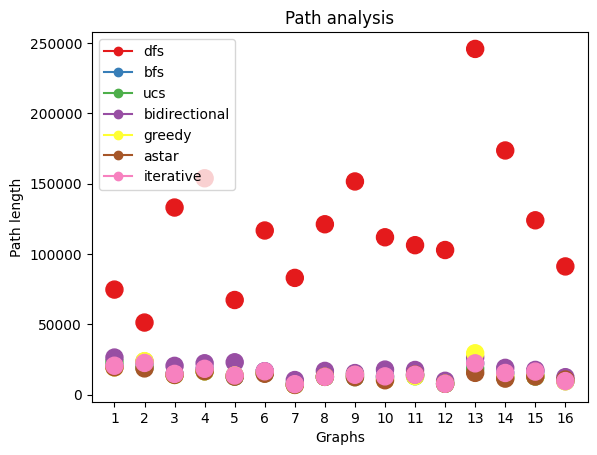

In [132]:
labels = ["dfs", "bfs", "ucs", "bidirectional", "greedy", "astar", "iterative"]
draw_plot(graph_paths, "Path analysis", "Path length", labels)

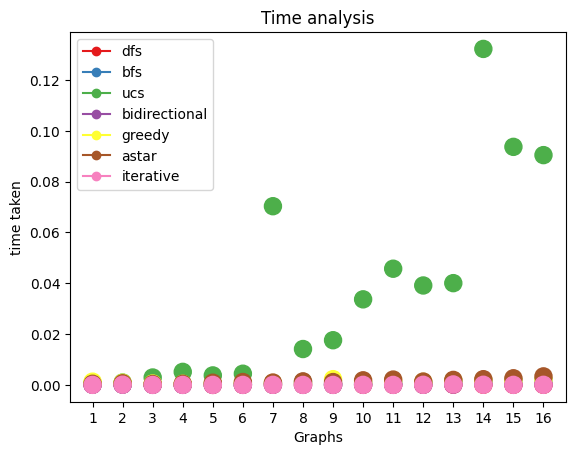

In [133]:
labels = ["dfs", "bfs", "ucs", "bidirectional", "greedy", "astar", "iterative"]
draw_plot(graph_times, "Time analysis","time taken", labels)

As can be seen form the graph dfs is giving worst solution lengths and in cotrast ucs is taking more time to give the solutions. To consider the difference between the other algoritmes let us run the algoritms without dfs.

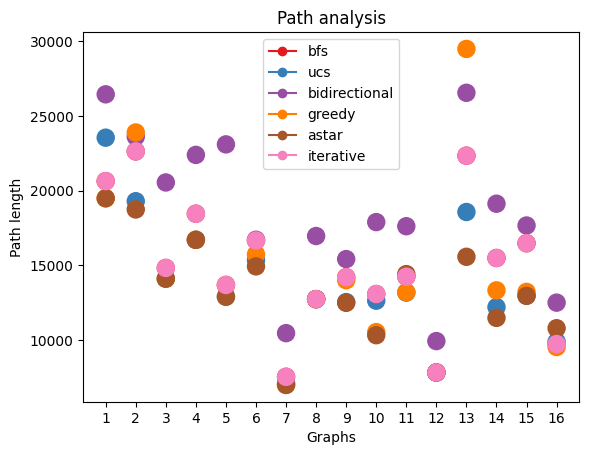

In [134]:
algos = [bfs, ucs, bidirectional, greedy, astar, iterative_deepening_search]
graph_paths, graph_times = test_algoritms(algos)
labels = ["bfs", "ucs", "bidirectional", "greedy", "astar", "iterative"]
draw_plot(graph_paths, "Path analysis", "Path length", labels)

The graph indicates that astar provides the best solution, although it takes longer than the other algorithms except ucs.

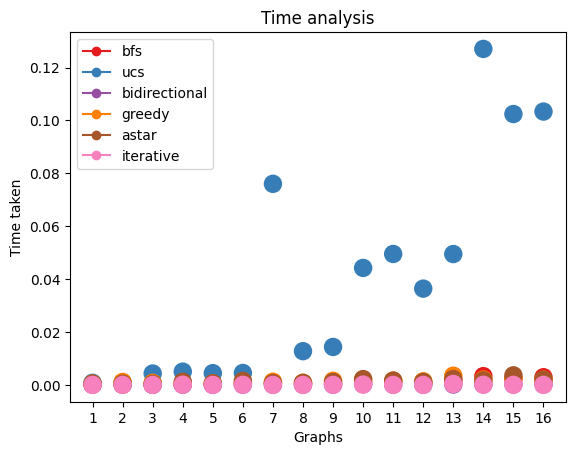

In [135]:
labels = ["bfs", "ucs", "bidirectional", "greedy", "astar", "iterative"]
draw_plot(graph_times, "Time analysis", "Time taken", labels)

We can also test the algoritms without ucs to analyse the time taken in a better way.

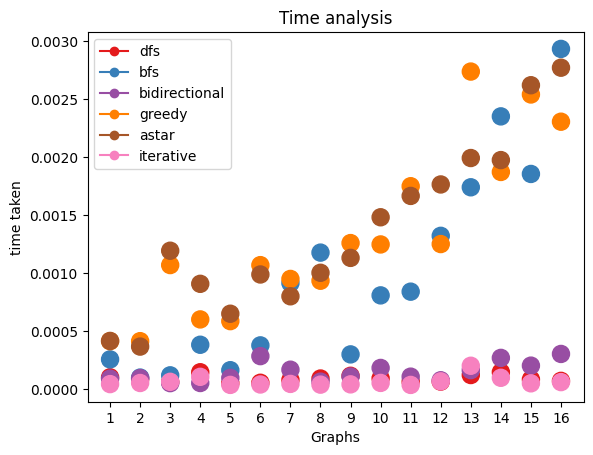

In [136]:
algos = [dfs1, bfs, bidirectional, greedy, astar, iterative_deepening_search]
graph_paths, graph_times = test_algoritms(algos)
labels = ["dfs", "bfs", "bidirectional", "greedy", "astar", "iterative"]
draw_plot(graph_times, "Time analysis", "time taken", labels)